In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import ipaddress
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [3]:
df=pd.read_csv('NF-CSE-CIC-IDS2018.csv')

In [4]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [5]:
df["Attack"].unique()

In [6]:
filtered_df = df[df['Label'] == 1]

In [7]:
filtered_df[filtered_df['Attack']=='Brute Force -Web']

In [8]:
df = df.dropna()  # Drop rows with missing values

In [9]:
def clean_ip_address(address):
    try:
        return str(ipaddress.IPv4Address(address))
    except ipaddress.AddressValueError:
        return np.nan


In [10]:
 ip_columns = ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR']
 for column in ip_columns:
     df[column] = df[column].apply(clean_ip_address)
df = df.drop(df[df['IPV4_SRC_ADDR'] == "0"].index)
df = df.drop(df[df['IPV4_DST_ADDR'] == "188."].index)



In [11]:
 filtered_df["Attack"].unique()

In [12]:
 percentage1 = filtered_df['Attack'].value_counts(normalize=True) * 100

 print(percentage1)

In [13]:
 percentage = df['Attack'].value_counts(normalize=True) * 100

 print(percentage)

Attack
Benign                      87.855642
DDoS attacks-LOIC-HTTP       4.506447
FTP-BruteForce               2.303990
DoS attacks-Hulk             1.288499
DoS attacks-SlowHTTPTest     1.257686
SSH-Bruteforce               1.122885
Infilteration                0.739622
DoS attacks-GoldenEye        0.391426
DoS attacks-Slowloris        0.271972
Bot                          0.186871
Brute Force -Web             0.031135
Brute Force -XSS             0.020793
DDOS attack-LOIC-UDP         0.019863
DDOS attack-HOIC             0.002741
SQL Injection                0.000429
Name: proportion, dtype: float64


In [14]:
#replace ip_address with int to fit with the classifier (like an Id)
df["IPV4_SRC_ADDR"]=df["IPV4_SRC_ADDR"].apply(lambda x: int (ipaddress.IPv4Address(x)))
df["IPV4_DST_ADDR"]=df["IPV4_DST_ADDR"].apply(lambda x: int (ipaddress.IPv4Address(x)))
#Split Dataset to X and y ; y = f(X)
X = df.drop(['Attack','Label'], axis=1)
y = df['Attack']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Choose a classification algorithm and create an instance of it
 classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Train the classifier
classifier.fit(X_train, y_train)

In [17]:
save trained model
joblib.dump(classifier, 'saved_model.pkl')

In [18]:
#load model
classifier = joblib.load('saved_model.pkl')

In [19]:
# Predict the target variable for the test data
y_pred = classifier.predict(X_test)

In [20]:
# Evaluate the random forest classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9923412849721176


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9923
Precision: 0.7881
Recall: 0.7731
F1 Score: 0.7774


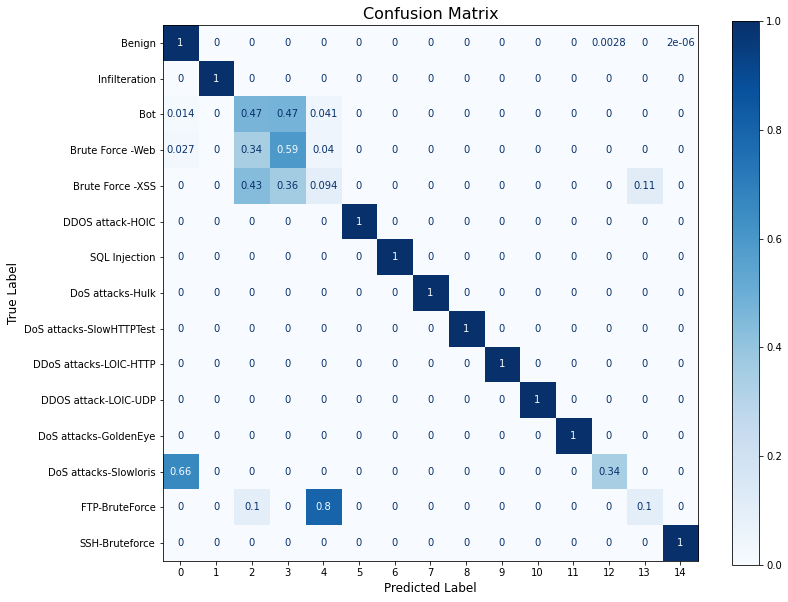

In [22]:
# Generate the confusion matrix
confusion_matrix = plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,normalize='true')

# Adjust the figure size
confusion_matrix.figure_.set_size_inches(12, 10)

# Convert the values and format them
values = confusion_matrix.confusion_matrix / confusion_matrix.confusion_matrix.sum(axis=1, keepdims=True)
values = np.round(values, decimals=2)
value_format = lambda x: f'{x:.2f}'

# Replace x-axis labels with numbers
num_labels = values.shape[1]
confusion_matrix.ax_.set_xticks(np.arange(num_labels))
confusion_matrix.ax_.set_xticklabels(np.arange(num_labels))

# Set y-axis labels with dataset labels
labels = df["Attack"].unique()  # Replace with your dataset labels
confusion_matrix.ax_.set_yticklabels(labels)

# Set font size for the labels and title
confusion_matrix.ax_.set_xlabel('Predicted Label', fontsize=14)
confusion_matrix.ax_.set_ylabel('True Label', fontsize=14)
confusion_matrix.ax_.set_title('Confusion Matrix', fontsize=16)
confusion_matrix.ax_.xaxis.label.set_size(12)
confusion_matrix.ax_.yaxis.label.set_size(12)
confusion_matrix.ax_.tick_params(axis='both', which='major', labelsize=10)

#save matrix
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

# Show the confusion matrix
plt.show()


In [23]:
#TEST
import time
sample_data = [
    {
        'IPV4_SRC_ADDR': '192.168.0.1',
        'L4_SRC_PORT': 1234,
        'IPV4_DST_ADDR': '10.0.0.1',
        'L4_DST_PORT': 80,
        'PROTOCOL': 6,
        'L7_PROTO': 91,
        'IN_BYTES': 500,
        'OUT_BYTES': 1000,
        'IN_PKTS': 5,
        'OUT_PKTS': 10,
        'TCP_FLAGS': 30,
        'FLOW_DURATION_MILLISECONDS': 500,
        'Label': 0,
        'Attack': 'Benign'
    },
    {
        'IPV4_SRC_ADDR': '13.58.82.37',
        'L4_SRC_PORT': 1027,
        'IPV4_DST_ADDR': '172.31.69.28',
        'L4_DST_PORT': 500,
        'PROTOCOL': 17,
        'L7_PROTO': 79.178,
        'IN_BYTES': 2640,
        'OUT_BYTES': 0,
        'IN_PKTS': 5,
        'OUT_PKTS': 0,
        'TCP_FLAGS': 0,
        'FLOW_DURATION_MILLISECONDS': 4247473,
        'Label': 1,
        'Attack': 'Brute Force -Web'
    },
        {
        'IPV4_SRC_ADDR': '172.31.69.12',
        'L4_SRC_PORT': 52246,
        'IPV4_DST_ADDR': '172.31.0.2',
        'L4_DST_PORT': 53,
        'PROTOCOL': 17,  
        'L7_PROTO': 5.126, 
        'IN_BYTES': 197,
        'OUT_BYTES': 357,
        'IN_PKTS': 3,
        'OUT_PKTS': 3,
        'TCP_FLAGS': 0,
        'FLOW_DURATION_MILLISECONDS': 0,
        'Label': 1,
        'Attack': 'Infiltration'
    },

    
]

def process_event(event, model, event_number):
    # Simulated processing logic
    time.sleep(1)
    print(f"Processing event #{event_number}")

    # Simulated threat hunting logic
    features = [
        int(ipaddress.IPv4Address(event['IPV4_SRC_ADDR'])),
        event['L4_SRC_PORT'],
        int(ipaddress.IPv4Address(event['IPV4_DST_ADDR'])),
        event['L4_DST_PORT'],
        event['PROTOCOL'],
        event['L7_PROTO'],
        event['IN_BYTES'],
        event['OUT_BYTES'],
        event['IN_PKTS'],
        event['OUT_PKTS'],
        event['TCP_FLAGS'],
        event['FLOW_DURATION_MILLISECONDS']
    ]
    reshaped_features = [features]
    prediction = model.predict(reshaped_features)
    print(f"Threat prediction: {prediction}")
    



In [24]:
for i, event in enumerate(sample_data, start=1):
    process_event(event, classifier, i)